In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
input_file = 'Python-Machine-Learning-Cookbook/Chapter02/car.data.txt'

# Reading the data
X = []
y = []
count = 0
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)

X = np.array(X)
print(X)

[['vhigh' 'vhigh' '2' ... 'small' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'high' 'unacc']
 ...
 ['low' 'low' '5more' ... 'big' 'low' 'unacc']
 ['low' 'low' '5more' ... 'big' 'med' 'good']
 ['low' 'low' '5more' ... 'big' 'high' 'vgood']]


In [3]:
# Convert string data to numerical data
label_encoder = []
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    label_encoder.append(preprocessing.LabelEncoder())
    print (X[:,i])
    X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

['vhigh' 'vhigh' 'vhigh' ... 'low' 'low' 'low']
['vhigh' 'vhigh' 'vhigh' ... 'low' 'low' 'low']
['2' '2' '2' ... '5more' '5more' '5more']
['2' '2' '2' ... 'more' 'more' 'more']
['small' 'small' 'small' ... 'big' 'big' 'big']
['low' 'med' 'high' ... 'low' 'med' 'high']
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


In [4]:
# Train the classifier
# Build a Random Forest classifier
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7}
classifier = RandomForestClassifier(**params)
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [5]:
# Cross validation
from sklearn import model_selection
accuracy = model_selection.cross_val_score(classifier, X, y, scoring='accuracy', cv=3)
print ("Accuracy of the classifier: {}%".format(round(100*accuracy.mean(), 2)))

Accuracy of the classifier: 77.66%


In [6]:
# Testing encoding on single data instance
input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
input_data_encoded = [-1] * len(input_data)
print ("input_data: ",input_data)
for i,item in enumerate(input_data):
    input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))
input_data_encoded = np.array(input_data_encoded)
print("input_data_encoded: ", input_data_encoded)


input_data:  ['vhigh', 'vhigh', '2', '2', 'small', 'low']
input_data_encoded:  [3 3 0 0 2 1]


In [7]:
# Predict and print output for a particular datapoint
reshaped_input_data_class = input_data_encoded.reshape(1,-1)
output_class = classifier.predict(input_data_encoded.reshape(1, -1))
print ("Output class: ", label_encoder[-1].inverse_transform(output_class))

Output class:  ['unacc']


In [8]:
# Extract validation curves

from sklearn.model_selection import validation_curve

classifier = RandomForestClassifier(max_depth=4, random_state=7)
parameter_grid = np.linspace(25, 200, 8).astype(int)

train_scores, validation_scores = validation_curve(classifier,
                                                  X, y,
                                                  "n_estimators",
                                                  parameter_grid,
                                                  cv=5)

print ("##### VALIDATION CURVES #####")
print ("Param: n_estimators:")
print ("Training scores:\n", train_scores, "\n")

print ("Param: n_estimators:")
print ("Validation scores:\n", validation_scores, "\n")

##### VALIDATION CURVES #####
Param: n_estimators:
Training scores:
 [[0.80680174 0.80824891 0.80752533 0.80694143 0.81055676]
 [0.79522431 0.80535456 0.81041968 0.80911063 0.81055676]
 [0.80101302 0.80680174 0.81114327 0.81127983 0.81561822]
 [0.8024602  0.80535456 0.81186686 0.80911063 0.8076645 ]
 [0.80028944 0.80463097 0.81114327 0.8076645  0.81272596]
 [0.80390738 0.80535456 0.81041968 0.81127983 0.81706435]
 [0.80390738 0.80463097 0.81114327 0.81344902 0.81778742]
 [0.80390738 0.80607815 0.81114327 0.81344902 0.81778742]] 

Param: n_estimators:
Validation scores:
 [[0.71098266 0.76589595 0.72543353 0.76811594 0.73333333]
 [0.71098266 0.75433526 0.71965318 0.77101449 0.73333333]
 [0.71098266 0.72254335 0.71965318 0.76521739 0.73623188]
 [0.71098266 0.71387283 0.71965318 0.75942029 0.72753623]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74202899]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74782609]
 [0.71098266 0.74566474 0.71965318 0.75942029 0.74492754]
 [0.71098266 0.75

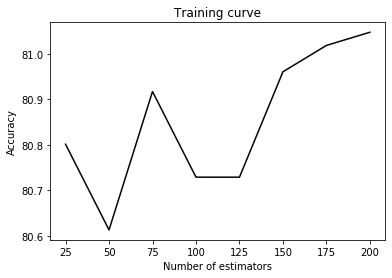

In [9]:
# Plot the training curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Training curve')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

Param: max_depth:
Training scores:
 [[0.71852388 0.70043415 0.70043415 0.69992769 0.69992769]
 [0.80607815 0.80535456 0.80752533 0.80043384 0.80694143]
 [0.90665702 0.91027496 0.92836469 0.89949385 0.90310918]
 [0.97467438 0.96743849 0.96888567 0.97541576 0.96601591]
 [0.99421129 0.99710564 0.99782923 1.         0.99349241]] 

Param: max_depth:
Validation scores:
 [[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.71098266 0.76589595 0.72543353 0.75942029 0.73333333]
 [0.71387283 0.76300578 0.7283237  0.82898551 0.83768116]
 [0.67630058 0.78612717 0.78034682 0.79710145 0.88695652]
 [0.6416185  0.76878613 0.75722543 0.80869565 0.87536232]] 



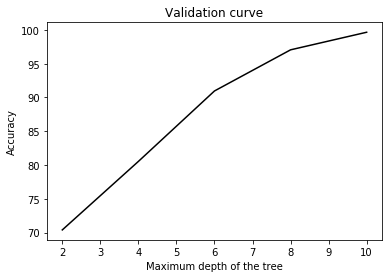

In [10]:
# Plot the validation curve
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
parameter_grid = np.linspace(2, 10, 5).astype(int)

train_scores, validation_scores = validation_curve(classifier,
                                                  X, y,
                                                  "max_depth",
                                                  parameter_grid,
                                                  cv=5)

print ("Param: max_depth:")
print ("Training scores:\n", train_scores, "\n")

print ("Param: max_depth:")
print ("Validation scores:\n", validation_scores, "\n")

plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Validation curve')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()

In [11]:
# Learning curves
from sklearn.model_selection import learning_curve

classifier = RandomForestClassifier(random_state=7)

parameter_grid = np.array([200, 500, 800, 1100])
train_sizes, train_scores, validation_scores = learning_curve(classifier,
                                                             X, y,
                                                             train_sizes=parameter_grid,
                                                             cv=5)
print ("##### Learning curves #####")
print ("Training scores:\n{}\n".format(train_scores))
print ("Validation scores:\n{}\n".format(validation_scores))

##### Learning curves #####
Training scores:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

Validation scores:
[[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.71387283 0.76878613 0.77456647 0.76811594 0.70144928]
 [0.6734104  0.78612717 0.63583815 0.76811594 0.76811594]
 [0.71387283 0.75433526 0.78901734 0.75942029 0.76811594]]



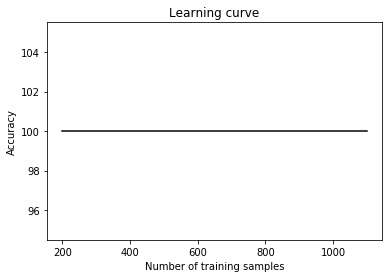

In [12]:
# Plot the learning curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Learning curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()